# Exploración de datos

# Pymes Colombia

El proyecto se centra en desarrollar modelos de clasificación basados en Machine Learning para identificar PYMEs colombianas con desempeño financiero sobresaliente. Esto incluye analizar variables de liquidez, rentabilidad, endeudamiento y factores macroeconómicos, abordando desafíos como la influencia de la pandemia y procesos de reestructuración. El objetivo es crear benchmarks más precisos por región y sector, que puedan asistir a tomadores de decisiones en financiación e inversión.

### Definición de las variables:
1. **Cantidad de años de la empresa**: Número de años desde la creación de la empresa.
2. **Fecha de Corte**: Fecha en la que se realizó el análisis o registro financiero.
3. **Total de activos (Assets)**: Valor total de los recursos controlados por la empresa.
4. **Total pasivos (Liabilities)**: Obligaciones financieras totales de la empresa.
5. **Razón corriente**: Indicador de liquidez; relación entre activos corrientes y pasivos corrientes.
6. **Rotación inventario producto terminado**: Frecuencia con la que se vende y reemplaza el inventario de productos terminados.
7. **Rotación cartera**: Velocidad con la que se recuperan las cuentas por cobrar.
8. **Rotación proveedores**: Tiempo promedio que tarda la empresa en pagar a sus proveedores.
9. **Productividad KTNO**: Indicador de eficiencia, puede representar la productividad del capital de trabajo neto operativo.
10. **ROA (Return on Assets)**: Rentabilidad sobre los activos, mide la eficiencia en el uso de los activos para generar utilidades.
11. **ROE (Return on Equity)**: Rentabilidad sobre el patrimonio, mide la ganancia generada sobre el capital de los propietarios.
12. **Nivel de endeudamiento**: Proporción de deuda en relación con los activos totales.
13. **Generación Efectivo**: Cantidad de efectivo generado por las operaciones de la empresa.
14. **FLC (Flujo de Caja Libre)**: Efectivo disponible después de cubrir los gastos operativos y de inversión.
15. **FDC/FLC**: Relación entre flujo de caja disponible y flujo de caja libre, indicador de sostenibilidad.
16. **SD (Servicio de Deuda)**: Recursos destinados al pago de intereses y principal de las deudas.
17. **FDC (Flujo de Caja Disponible)**: Flujo de efectivo después de operaciones y reinversiones mínimas.
18. **Generación FLC**: Tasa o métrica relacionada con la generación de flujo de caja libre.
19. **Tasa de Desempleo**: Porcentaje de la población económicamente activa que está desempleada.
20. **Tasa de Ocupación**: Porcentaje de la población económicamente activa que tiene empleo.
21. **PIB**: Producto Interno Bruto nacional, indicador de actividad económica.
22. **PIB DEP**: Producto Interno Bruto del departamento, mide la actividad económica regional.

## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

In [2]:
data = pd.read_excel('finalpymes.xlsx')

# Descripción General

In [10]:
data.shape

(141621, 29)

Este conjunto de datos está conformado por 29 columnas que incluyen variables financieras y macroeconómicas como activos, pasivos, rotaciones, tasas de empleo y desempeño financiero, entre otras, las cuales son claves para evaluar el éxito de las PYMEs. Además, cuenta con 141,621 registros.

In [11]:
data.head(5)

,Estado actual,NIT,Concepto del Revisor fiscal,Tiene Revisor fiscal?,Tipo societario,años,Departamento,Fecha de Corte,CIIU,Total de activos,...,Generación Efectivo,FLC,FDC/FLC,SD,FDC,Generación FLC,Tasa de Desempleo,Tasa de Ocupación,PIB,PIB DEP
0,ACTIVA,800000268,03. LIMPIO,SI,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,30.0,ATLANTICO,2017,Actividades inmobiliarias.,3766237.0,...,-1.131487,-40772.0,1.000000,0.0,-40772.0,-1.131487,7.557648,11.548318,8535.557383,36782.627008
1,ACTIVA,800000276,03. LIMPIO,SI,01. SOCIEDAD ANÓNIMA,30.0,SANTANDER,2017,"Agricultura, ganadería, caza, silvicultura y p...",158570380.0,...,0.004369,-14525925.0,1.000000,0.0,-14525925.0,9.366386,7.630040,211.472511,5140.802275,49333.910887
2,ACTIVA,800000313,03. LIMPIO,SI,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,30.0,BOGOTA D.C.,2017,Industrias manufactureras.,4973845.0,...,-18.713938,-134970.0,1.852263,115030.0,-250000.0,-10.962476,8.729730,173.337730,19523.998522,212289.141969
3,ACTIVA,800000439,03. LIMPIO,SI,03. SOCIEDAD LIMITADA,30.0,CUNDINAMARCA,2017,Comercio al por mayor y al por menor; reparaci...,2969939.0,...,-1.449247,-81721.0,5.966667,405881.0,-487602.0,-0.438714,8.729730,227.644906,8523.010078,49985.621838
4,ACTIVA,800000457,03. LIMPIO,SI,03. SOCIEDAD LIMITADA,30.0,BOGOTA D.C.,2017,"Actividades profesionales, científicas y técni...",5687179.0,...,1.461836,628069.0,1.000000,0.0,628069.0,1.461836,8.729730,78.165053,83519.076723,212289.141969


In [12]:
data.columns

Index(['Estado actual', 'NIT', 'Concepto del Revisor fiscal',
       'Tiene Revisor fiscal?', 'Tipo societario', 'años', 'Departamento',
       'Fecha de Corte', ' CIIU', 'Total de activos ', 'Total pasivos ',
       'Razón corriente', 'Rotación inventario producto terminado',
       'Rotación cartera', 'Rotación proveedores', 'Productividad KTNO', 'ROA',
       'ROE', 'Nivel de endeudamiento', 'Generación Efectivo', 'FLC',
       'FDC/FLC', 'SD', 'FDC', 'Generación FLC', 'Tasa de Desempleo',
       'Tasa de Ocupación', 'PIB', 'PIB DEP'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141621 entries, 0 to 141620
Data columns (total 29 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Estado actual                           141621 non-null  object 
 1   NIT                                     141621 non-null  int64  
 2   Concepto del Revisor fiscal             141621 non-null  object 
 3   Tiene Revisor fiscal?                   141621 non-null  object 
 4   Tipo societario                         141621 non-null  object 
 5   años                                    141497 non-null  float64
 6   Departamento                            141621 non-null  object 
 7   Fecha de Corte                          141621 non-null  int64  
 8    CIIU                                   141621 non-null  object 
 9   Total de activos                        141620 non-null  float64
 10  Total pasivos                           1416

El conjunto de datos consta de variables numéricas y categóricas que incluyen información financiera, operativa y macroeconómica. Entre las variables destacan el NIT, tipo societario, estado actual, total de activos, pasivos, razón corriente, ROA, ROE, rotación de inventarios, cartera y proveedores, productividad KTNO, y datos macroeconómicos como el PIB y PIB departamental. Algunas columnas tienen valores nulos, como "Razón corriente" (139,976 no nulos) y "Rotación inventario" (102,820 no nulos).

# Variables

## Variables Categoricas

In [13]:
data.describe(include=object)

,Estado actual,Concepto del Revisor fiscal,Tiene Revisor fiscal?,Tipo societario,Departamento,CIIU
count,141621,141621,141621,141621,141621,141621
unique,6,6,2,8,25,21
top,ACTIVA,03. LIMPIO,SI,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,BOGOTA D.C.,Comercio al por mayor y al por menor; reparaci...
freq,136052,121338,125650,98179,60258,36820


In [ ]:

def plot_bar_distribution(data, column, title, xlabel, ylabel):
    value_counts = data[column].value_counts()

    plt.figure(figsize=(10, 6))
    colors = sns.color_palette('cool', len(value_counts)) 
    bars = plt.bar(
        value_counts.index, 
        value_counts.values, 
        color=colors, 
    )
    for bar in bars:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.1,
            str(bar.get_height()),
            ha='center',
            fontsize=12,
            color='black'
        )
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()


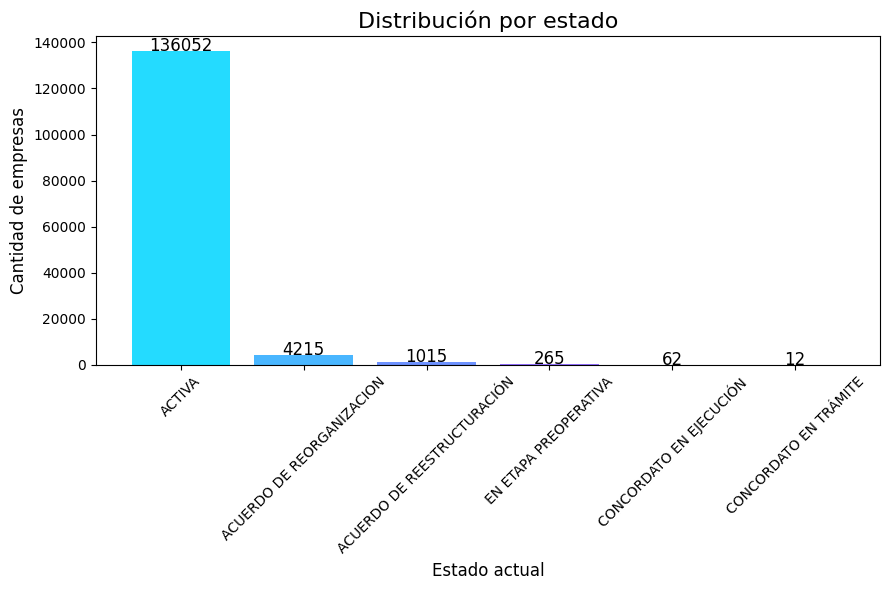

In [61]:
plot_bar_distribution(data, 'Estado actual', 'Distribución por estado', 'Estado actual', 'Cantidad de empresas')

El gráfico muestra la distribución de empresas según su estado actual, utilizando un diagrama de barras. El estado "ACTIVA" tiene una cantidad abrumadora de empresas, alcanzando las 136,052, lo que representa la mayoría de las empresas en la base de datos. Las categorías de "ACUERDO DE REORGANIZACIÓN" y "ACUERDO DE REESTRUCTURACIÓN" también tienen una presencia significativa, con 4,215 y 1,015 empresas respectivamente. En contraste, las categorías "EN ETAPA PREOPERATIVA", "CONCORDATO EN EJECUCIÓN" y "CONCORDATO EN TRÁMITE" tienen una cantidad mucho menor de empresas, con 265, 62 y 12 respectivamente. Esta distribución indica que la mayoría de las empresas están en estado activo, mientras que las demás categorías son considerablemente menos representadas.

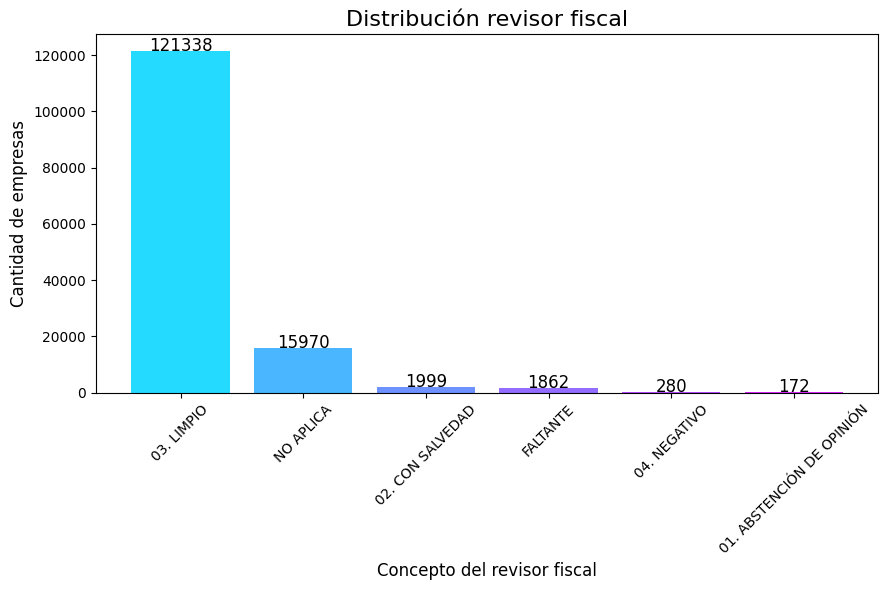

In [62]:
plot_bar_distribution(data, 'Concepto del Revisor fiscal', 'Distribución revisor fiscal', 'Concepto del revisor fiscal', 'Cantidad de empresas')

El gráfico muestra la distribución de empresas según el concepto del revisor fiscal. El estado "LIMPIO" es claramente dominante, con 121,338 empresas, lo que representa la gran mayoría de la base de datos. A continuación, "NO APLICA" tiene 15,970 empresas, una cifra considerablemente menor, pero aún destacada. Las otras categorías, como "CON SALVEDAD" (1,999), "FALTANTE" (1,862), "NEGATIVO" (280) y "ABSTENCIÓN DE OPINIÓN" (172), tienen una representación significativamente más baja, indicando que las opiniones fiscales negativas o en abstención son relativamente poco frecuentes en comparación con las opiniones "LIMPIAS".

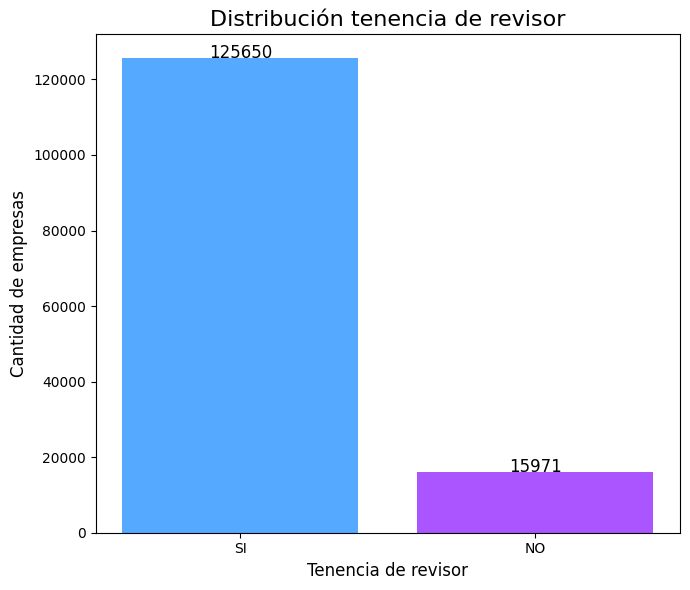

In [66]:
plot_bar_distribution(data, 'Tiene Revisor fiscal?', 'Distribución tenencia de revisor', 'Tenencia de revisor', 'Cantidad de empresas')

El gráfico muestra la distribución de empresas según la tenencia de revisor. La categoría "SI" domina ampliamente, con 125,650 empresas, lo que indica que la gran mayoría de las empresas en la base de datos cuentan con un revisor. En cambio, la categoría "NO" tiene solo 15,971 empresas, representando una proporción mucho menor de empresas sin revisor. Esta distribución sugiere que, en general, las empresas tienden a cumplir con la normativa de tener un revisor fiscal.

In [ ]:
def plot_bar_distribution_horizontal(data, column, title, xlabel, ylabel):
    value_counts = data[column].value_counts()

    plt.figure(figsize=(10, 6))
    colors = sns.color_palette('cool', len(value_counts))
    bars = plt.barh(
        value_counts.index,
        value_counts.values,
        color=colors,
    )
    for bar in bars:
        plt.text(
            bar.get_width() + 0.5,  
            bar.get_y() + bar.get_height() / 2,
            str(int(bar.get_width())),
            va='center',
            fontsize=8,
            color='black'
        )
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.tight_layout()
    plt.show()

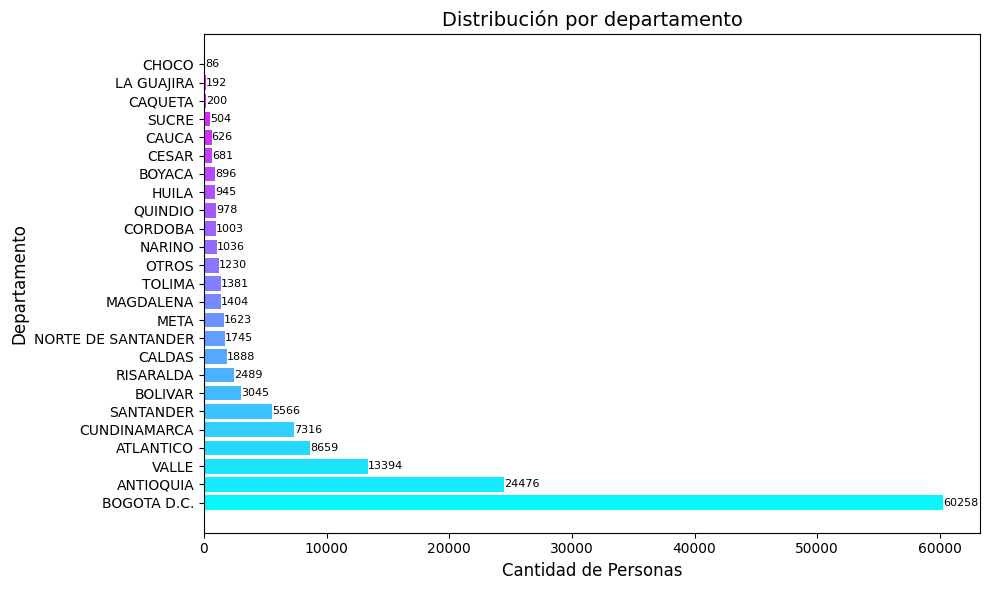

In [103]:
plot_bar_distribution_horizontal(data, 'Departamento', 'Distribución por departamento', 'Cantidad de Personas', 'Departamento')


El gráfico muestra la distribución de personas por departamento en Colombia, con una clara predominancia de Bogotá D.C., que supera las 60,000 personas. A continuación, los departamentos de Antioquia y Valle siguen con 24,476 y 13,394 personas respectivamente, siendo las tres regiones con la mayor concentración de personas. Otros departamentos, como Atlántico (8,659) y Cundinamarca (7,316), también presentan cifras destacadas. Por otro lado, departamentos como Chocó, La Guajira y Caquetá tienen una cantidad mucho menor de personas, con 86, 192 y 200 respectivamente.

C:\Users\KELLY\AppData\Local\Temp\ipykernel_115552\3917454676.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


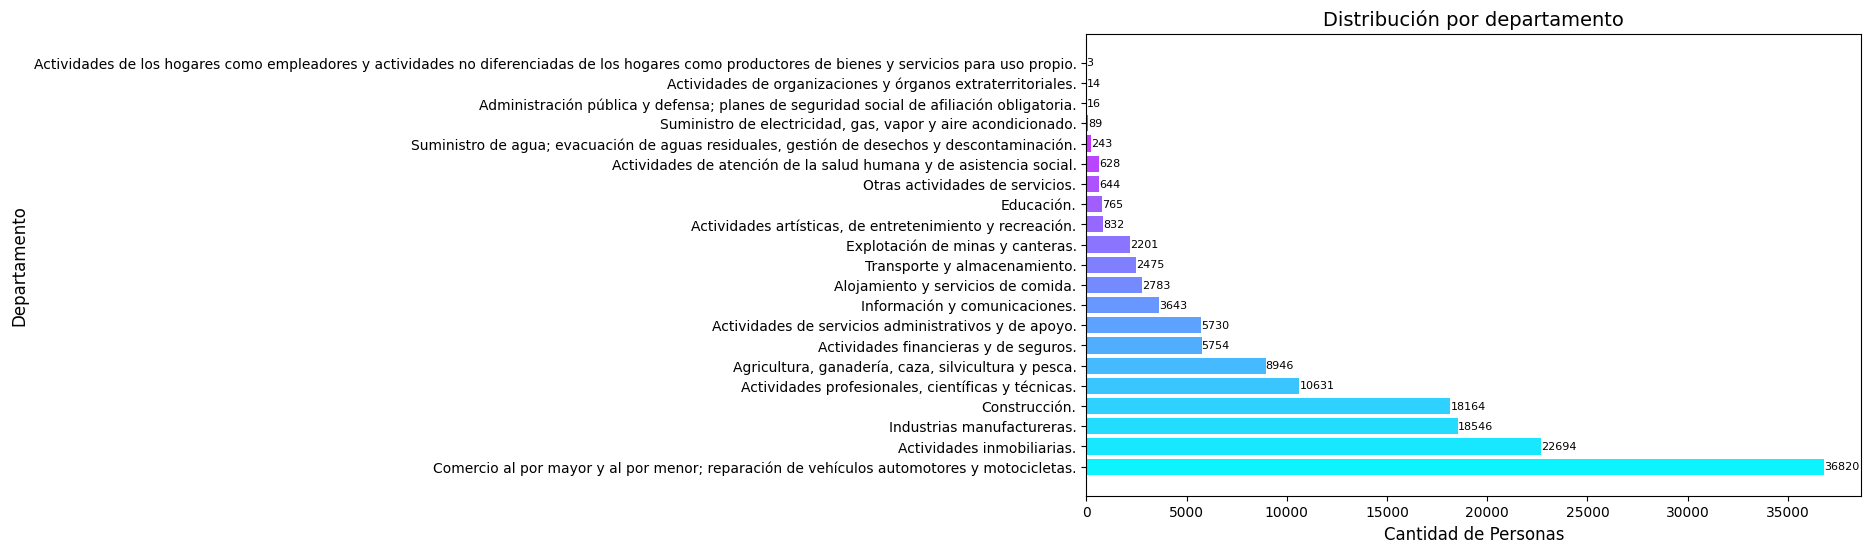

In [104]:
plot_bar_distribution_horizontal(data, ' CIIU', 'Distribución por departamento', 'Cantidad de Personas', 'Departamento')

El gráfico presenta la distribución de personas por diferentes actividades económicas. Se observa una notable concentración de personas en el sector de **comercio al por mayor y al por menor; reparación de vehículos automotores y motocicletas**, con 36,820 personas, seguida por **construcción** (22,694 personas) y **actividades profesionales, científicas y técnicas** (18,546 personas). Otros sectores como **industria manufacturera** y **agricultura, ganadería, caza, silvicultura y pesca** también tienen cifras destacadas con 18,164 y 8,946 personas respectivamente. Sin embargo, los sectores como **educación** (832 personas) y **actividades de organizaciones y órganos extraterritoriales** (14 personas) presentan una menor concentración. 

## Variables Númericas

In [14]:
data.describe()

,NIT,años,Fecha de Corte,Total de activos,Total pasivos,Razón corriente,Rotación inventario producto terminado,Rotación cartera,Rotación proveedores,Productividad KTNO,...,Generación Efectivo,FLC,FDC/FLC,SD,FDC,Generación FLC,Tasa de Desempleo,Tasa de Ocupación,PIB,PIB DEP
count,1.416210e+05,141497.000000,141621.000000,1.416200e+05,1.416200e+05,1.399760e+05,1.028200e+05,1.318020e+05,1.028200e+05,1.318020e+05,...,140490.000000,1.416210e+05,1.325510e+05,1.325510e+05,1.325510e+05,1.404900e+05,140391.000000,133180.000000,141607.000000,141621.000000
mean,8.663054e+08,19.252260,2020.340868,1.870048e+07,9.269844e+06,3.542135e+02,5.195553e+04,2.498015e+05,7.022245e+04,5.155356e+02,...,-3.742813,4.973162e+04,2.592954e+01,6.523002e+05,-5.991656e+05,-6.107715e+01,12.047581,154.743101,38549.956253,164548.698077
std,4.087900e+07,13.166765,1.907594,1.395339e+08,9.622129e+07,3.423888e+04,1.339897e+07,2.176889e+07,8.729487e+06,1.121748e+05,...,2000.466879,2.234453e+07,9.069926e+03,2.041476e+07,1.320598e+07,1.742533e+04,3.573952,133.417436,37322.515846,104461.698562
min,8.000001e+08,0.000000,2017.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.098427e+07,...,-513276.000000,-2.372958e+09,-1.619655e+04,0.000000e+00,-2.372958e+09,-6.281511e+06,3.209824,0.029873,13.451994,3652.635931
25%,8.300328e+08,10.000000,2019.000000,4.143675e+06,1.207430e+06,1.178524e+00,7.118213e-01,3.579092e+01,3.226601e+01,6.095384e-02,...,-0.332381,-2.542350e+05,1.000000e+00,0.000000e+00,-4.961745e+05,-6.732204e-01,8.971398,35.379945,8440.661544,57797.345980
50%,8.920030e+08,16.000000,2020.000000,8.318130e+06,3.277588e+06,1.977679e+00,4.425365e+01,8.439409e+01,7.615839e+01,2.688085e-01,...,0.011560,5.560000e+02,1.000000e+00,0.000000e+00,-1.036300e+04,1.498066e-01,11.722654,117.635000,22796.859394,161904.679773
75%,9.004209e+08,26.000000,2022.000000,1.763481e+07,8.033026e+06,4.328762e+00,1.487696e+02,2.063634e+02,1.788139e+02,8.411050e-01,...,0.632728,4.332520e+05,1.000000e+00,2.534450e+04,2.907150e+05,1.350429e+00,13.323139,243.651000,64238.892795,243835.887573
max,9.017396e+08,335.000000,2023.000000,2.593985e+10,2.141922e+10,7.427874e+06,4.283006e+09,5.383320e+09,1.656346e+09,1.329694e+07,...,263267.000000,5.830583e+09,3.301999e+06,5.901266e+09,1.371313e+09,3.516841e+05,23.242521,584.526000,124683.823762,345847.243838


In [122]:
data['NIT'].value_counts()

NIT
860003375    8
900051963    8
830065828    8
800051410    8
800221720    8
            ..
900560474    1
830051566    1
900558368    1
900473156    1
901739550    1
Name: count, Length: 32306, dtype: int64

El resultado del método `value_counts()` para la columna **NIT** muestra la frecuencia con la que cada número de identificación tributaria (NIT) aparece en la base de datos. Lla base de datos contiene una gran cantidad de NITs únicos, con 32,306 valores diferentes. Este comportamiento sugiere que la base de datos incluye un número considerable de empresas o entidades distintas, con pocos registros repetidos.

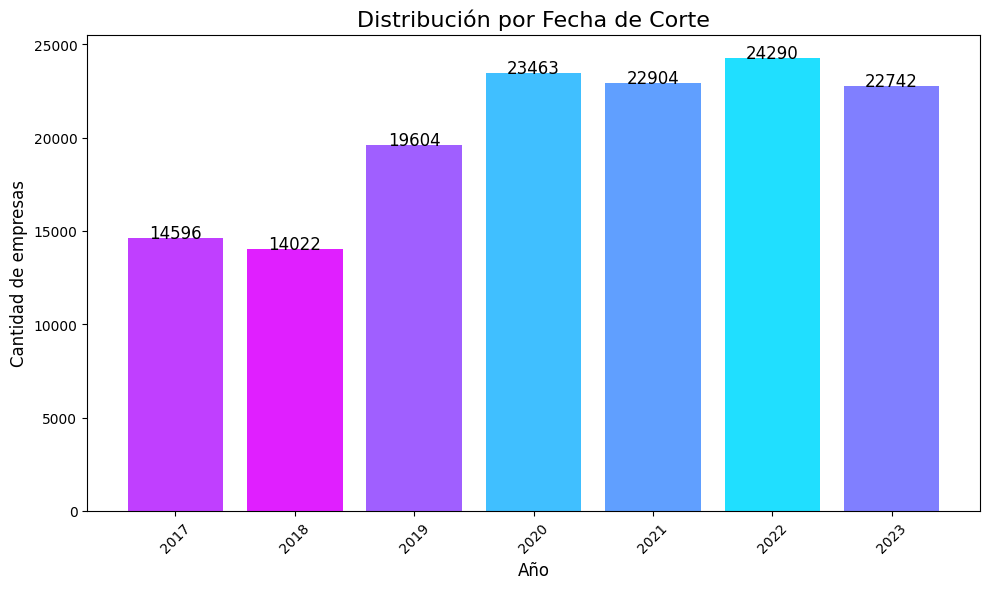

In [120]:
plot_bar_distribution(data, 'Fecha de Corte', 'Distribución por Fecha de Corte', 'Año', 'Cantidad de empresas')

El gráfico muestra la distribución de empresas según el año de corte. Se observa que la cantidad de empresas aumenta progresivamente desde 2017 hasta 2022. En 2017, hay 14,596 empresas, mientras que en 2018 la cifra es ligeramente inferior con 14,022. A partir de 2019, la cantidad de empresas aumenta considerablemente, alcanzando un máximo de 24,290 en 2022. Sin embargo, en 2023 la cifra disminuye ligeramente a 22,742, pero sigue siendo bastante alta. 

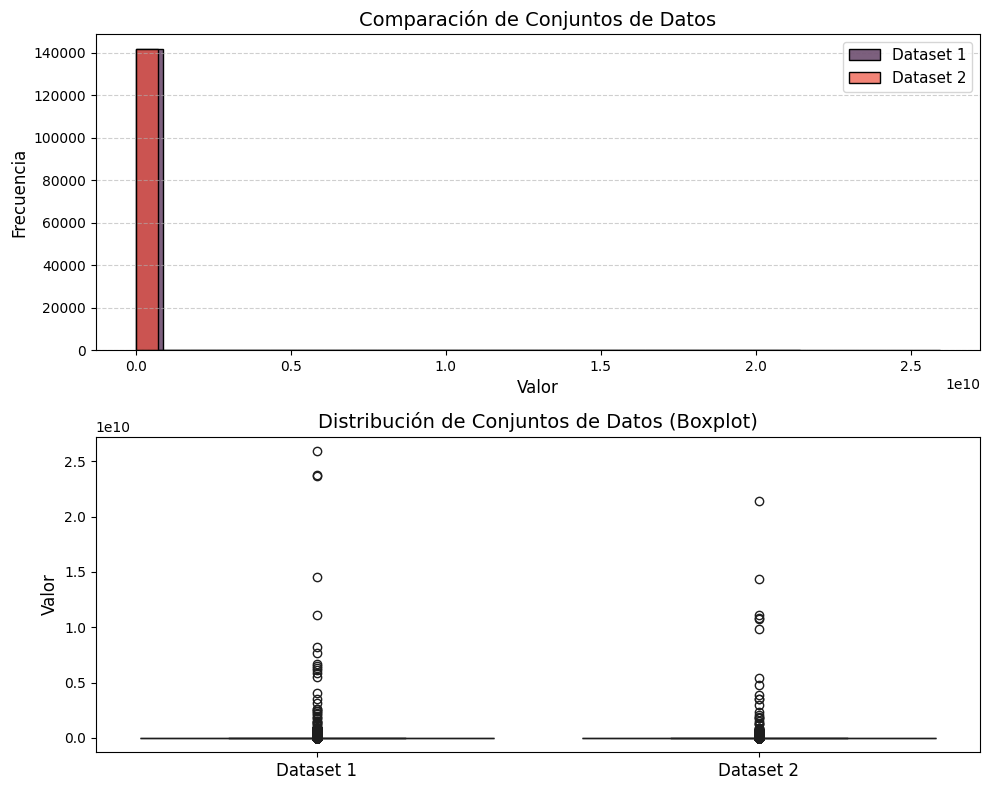

In [ ]:
data1 = data['Total de activos ']
data2 = data['Total pasivos ']

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)  
sns.histplot(data1, bins=30, color=sns.color_palette("rocket", 10)[1], label='Dataset 1', alpha=0.7)
sns.histplot(data2, bins=30, color=sns.color_palette("rocket", 10)[6], label='Dataset 2', alpha=0.7)
plt.title('Comparación de Conjuntos de Datos', fontsize=14)
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.subplot(2, 1, 2)  
sns.boxplot(data=[data1, data2], palette=[sns.color_palette("rocket", 10)[1], sns.color_palette("rocket", 10)[6]])
plt.xticks([0, 1], ['Dataset 1', 'Dataset 2'], fontsize=12)
plt.title('Distribución de Conjuntos de Datos (Boxplot)', fontsize=14)
plt.ylabel('Valor', fontsize=12)

plt.tight_layout()
plt.show()



El gráfico muestra una comparación entre dos conjuntos de datos, **Dataset 1** y **Dataset 2**, que representan las columnas **"Total de activos"** y **"Total pasivos"** de la base de datos, respectivamente. 

En el primer gráfico, se presenta un **histograma** que ilustra la frecuencia de los valores de cada conjunto de datos. Se observa que **Dataset 1** (Total de activos) tiene una distribución sesgada hacia valores cercanos a cero, con una concentración significativa de frecuencias en ese rango. Por otro lado, **Dataset 2** (Total pasivos) presenta una distribución similar, pero con una mayor dispersión, lo que sugiere que hay una mayor variabilidad en los pasivos en comparación con los activos.

En el segundo gráfico, un **boxplot** compara la distribución de ambos conjuntos de datos. Ambos conjuntos muestran una gran cantidad de **outliers**, con **Dataset 1** (activos) concentrado en valores más bajos y con algunos valores extremadamente altos, mientras que **Dataset 2** (pasivos) presenta una dispersión más amplia, con más valores extremos, lo que puede indicar pasivos extremadamente altos en algunas empresas.


### Liquidez

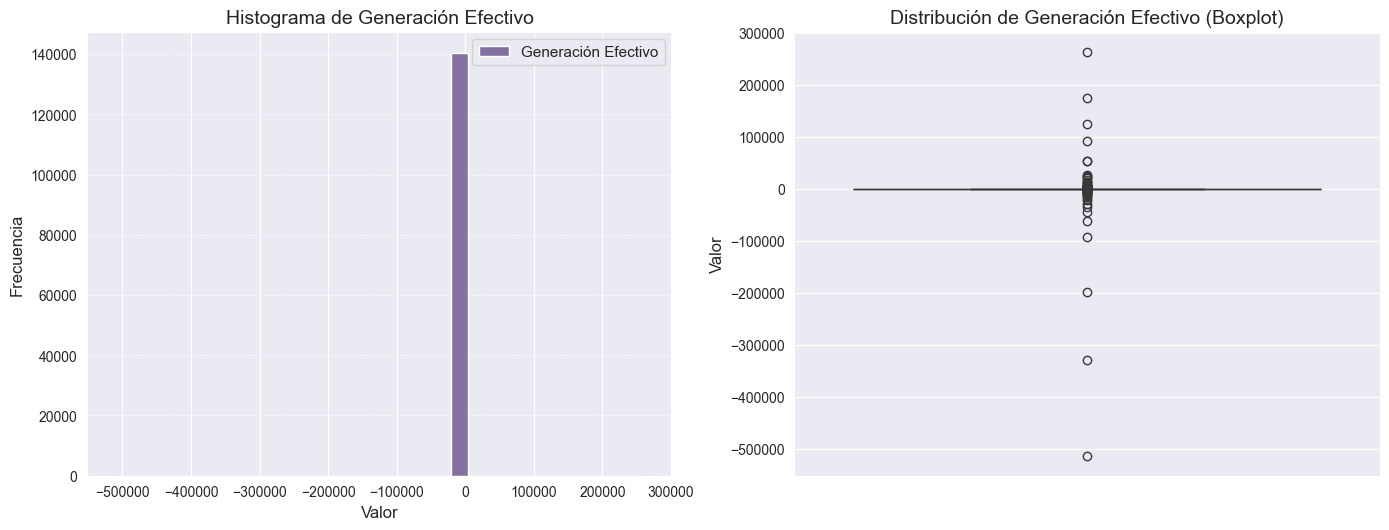

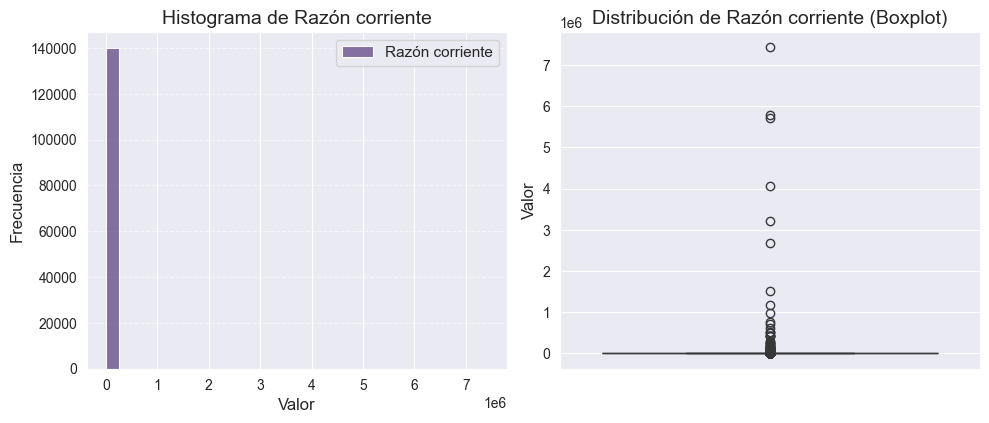

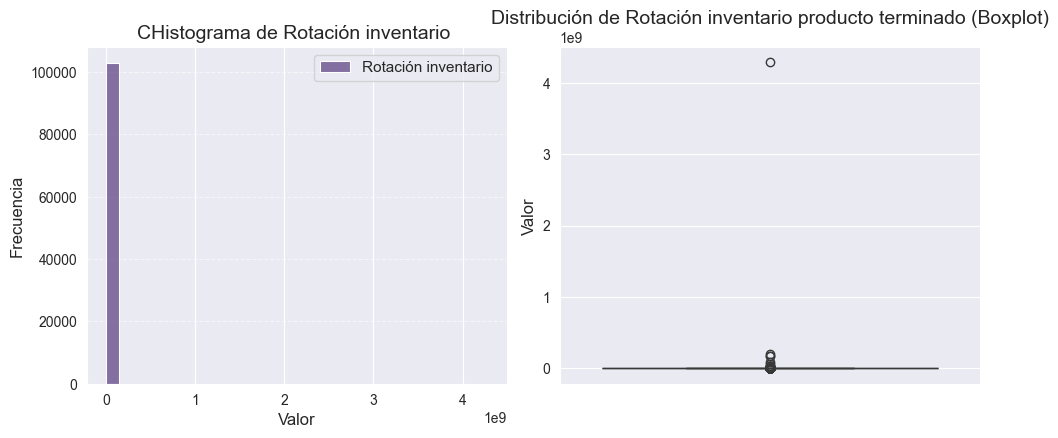

In [57]:
data3 = data['Generación Efectivo']
data4 = data['Razón corriente']
data5 = data['Rotación inventario producto terminado']

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)  
sns.histplot(data3, bins=30, color='#573d7f', label='Generación Efectivo', alpha=0.7)
plt.title('Histograma de Generación Efectivo', fontsize=14)
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.subplot(2, 2, 2)  
sns.boxplot(data3, color='#573d7f')

plt.title('Distribución de Generación Efectivo (Boxplot)', fontsize=14)
plt.ylabel('Valor', fontsize=12)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)  
sns.histplot(data4, bins=30, color='#573d7f', label='Razón corriente', alpha=0.7)
plt.title('Histograma de Razón corriente', fontsize=14)
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.subplot(2, 2, 2)  
sns.boxplot(data4, color='#573d7f')
plt.title('Distribución de Razón corriente (Boxplot)', fontsize=14)
plt.ylabel('Valor', fontsize=12)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)  
sns.histplot(data5, bins=30, color='#573d7f', label='Rotación inventario', alpha=0.7)
plt.title('CHistograma de Rotación inventario ', fontsize=14)
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.subplot(2, 2, 2)  
sns.boxplot(data5, color='#573d7f')

plt.title('Distribución de Rotación inventario producto terminado (Boxplot)', fontsize=14)
plt.ylabel('Valor', fontsize=12)



plt.tight_layout()
plt.show()


Los gráficos que muestras son histogramas y boxplots de varias métricas financieras y operativas, como **Generación Efectivo**, **Razón corriente**, y **Rotación de inventario**.

1. **Generación Efectivo**: El histograma y el boxplot indican una alta concentración de valores cerca de cero, lo que sugiere que la mayoría de las empresas tienen una generación de efectivo baja o nula. El boxplot también muestra una gran cantidad de **outliers** en los valores positivos, lo que indica la presencia de algunos valores extremos o empresas con generación de efectivo significativamente mayor.

2. **Razón corriente**: Al igual que la **Generación Efectivo**, la mayoría de las empresas tienen una **Razón corriente** cercana a cero, lo que podría indicar que muchas empresas tienen problemas de liquidez o recursos limitados para cubrir sus pasivos corrientes. El boxplot revela una dispersión notable con outliers, lo que podría reflejar algunos casos excepcionales de empresas con una razón corriente extremadamente alta.

3. **Rotación de inventario**: El comportamiento es similar a las métricas anteriores, con un histograma que muestra una alta concentración de empresas con una **Rotación de inventario** baja o cercana a cero. El boxplot también revela outliers que pueden indicar empresas con una rotación de inventario muy alta, lo que podría ser característico de empresas con una gestión eficiente de su inventario.

En general, los tres gráficos muestran que la mayoría de las empresas en la base de datos tienen valores bajos en estas métricas, pero también existen algunos valores extremos que podrían indicar un desempeño significativamente diferente en ciertos casos.

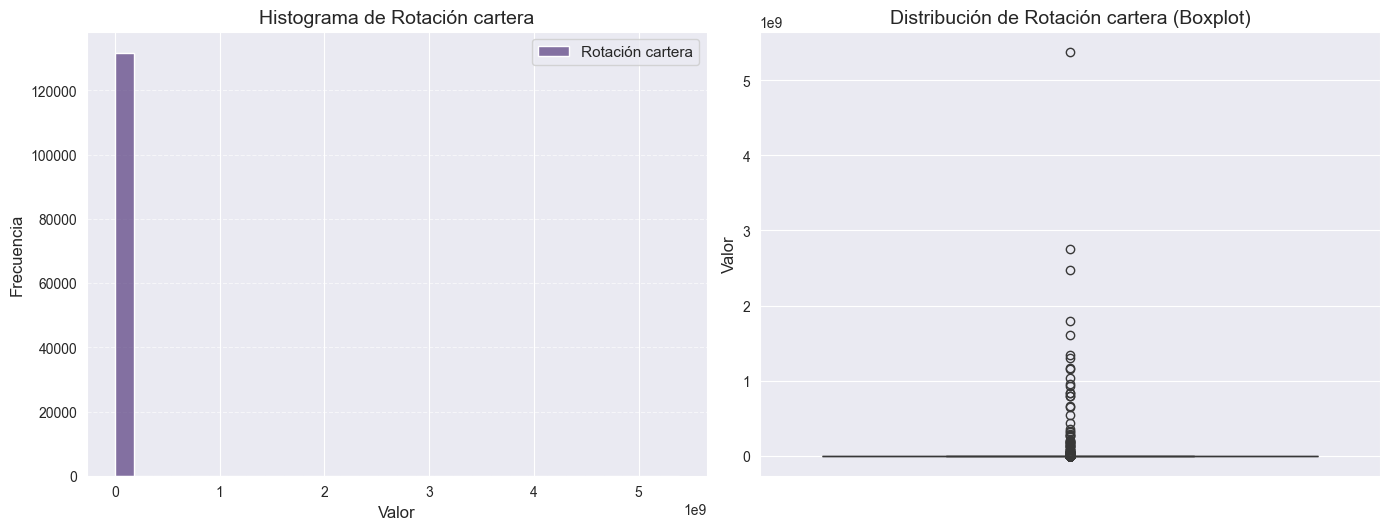

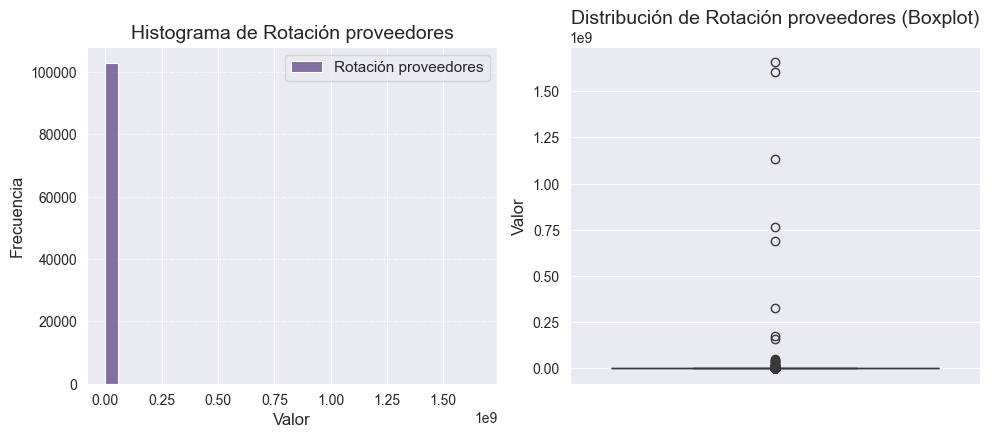

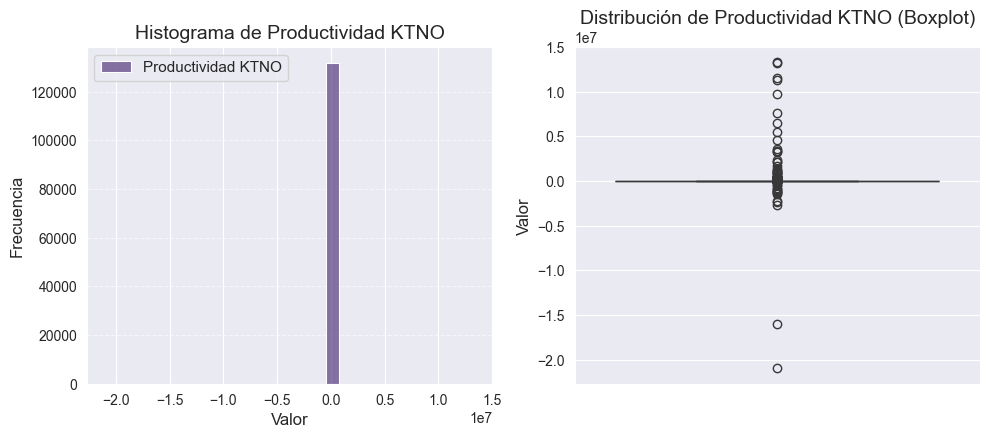

In [58]:
data3 = data['Rotación cartera']
data4 = data['Rotación proveedores']
data5 = data['Productividad KTNO']

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)  
sns.histplot(data3, bins=30, color='#573d7f', label='Rotación cartera', alpha=0.7)
plt.title('Histograma de Rotación cartera', fontsize=14)
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.subplot(2, 2, 2)  
sns.boxplot(data3, color='#573d7f')

plt.title('Distribución de Rotación cartera (Boxplot)', fontsize=14)
plt.ylabel('Valor', fontsize=12)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)  
sns.histplot(data4, bins=30, color='#573d7f', label='Rotación proveedores', alpha=0.7)
plt.title('Histograma de Rotación proveedores', fontsize=14)
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.subplot(2, 2, 2)  
sns.boxplot(data4, color='#573d7f')
plt.title('Distribución de Rotación proveedores (Boxplot)', fontsize=14)
plt.ylabel('Valor', fontsize=12)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)  
sns.histplot(data5, bins=30, color='#573d7f', label='Productividad KTNO', alpha=0.7)
plt.title('Histograma de Productividad KTNO', fontsize=14)
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.subplot(2, 2, 2)  
sns.boxplot(data5, color='#573d7f')

plt.title('Distribución de Productividad KTNO (Boxplot)', fontsize=14)
plt.ylabel('Valor', fontsize=12)



plt.tight_layout()
plt.show()

Los gráficos muestran una serie de métricas relacionadas con las empresas en la base de datos: **Rotación cartera**, **Rotación proveedores**, y **Productividad KTNO**.

1. **Rotación cartera**:
   - El **histograma** muestra que la mayoría de las empresas tienen una rotación de cartera cercana a cero, lo que sugiere que las empresas no están cobrando con frecuencia sus cuentas por cobrar, o que tienen un ciclo de cobro lento.
   - El **boxplot** revela una gran cantidad de **outliers** con valores extremadamente altos en la rotación de cartera, lo que podría indicar que algunas empresas tienen una rotación mucho mayor en comparación con otras.

2. **Rotación proveedores**:
   - Similar a la rotación de cartera, el **histograma** muestra una alta concentración de valores cercanos a cero, lo que podría indicar que las empresas están pagando a sus proveedores muy lentamente o en intervalos largos.
   - El **boxplot** también indica varios **outliers** en valores muy altos, lo que refleja la presencia de algunas empresas con una rotación de proveedores excepcionalmente alta.

3. **Productividad KTNO**:
   - El **histograma** para la productividad KTNO muestra que la mayoría de las empresas tienen valores bajos o cercanos a cero en términos de productividad.
   - El **boxplot** muestra una dispersión considerable con **outliers** negativos, sugiriendo que algunas empresas tienen una productividad muy baja o incluso valores negativos, lo que podría estar asociado con pérdidas o bajo rendimiento en ciertas empresas.

### Rentabilidad

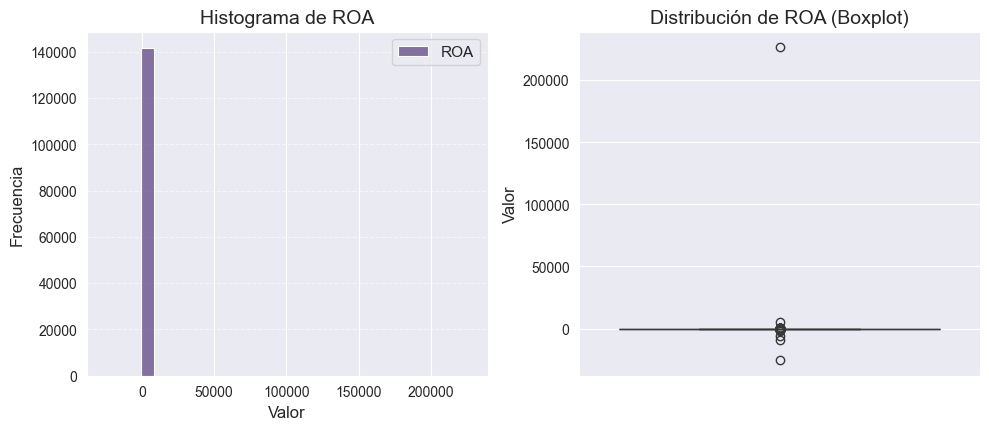

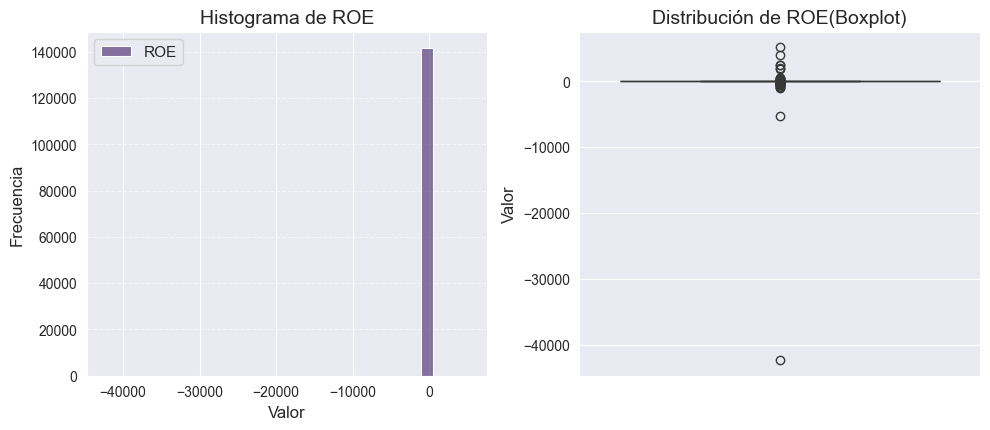

In [60]:
data6 = data['ROA']
data7 = data['ROE']

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)  
sns.histplot(data6, bins=30, color='#573d7f', label='ROA', alpha=0.7)
plt.title('Histograma de ROA', fontsize=14)
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.subplot(2, 2, 2)  
sns.boxplot(data6, color='#573d7f')

plt.title('Distribución de ROA (Boxplot)', fontsize=14)
plt.ylabel('Valor', fontsize=12)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)  
sns.histplot(data7, bins=30, color='#573d7f', label='ROE', alpha=0.7)
plt.title('Histograma de ROE', fontsize=14)
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.subplot(2, 2, 2)  
sns.boxplot(data7, color='#573d7f')
plt.title('Distribución de ROE(Boxplot)', fontsize=14)
plt.ylabel('Valor', fontsize=12)
plt.tight_layout()
plt.show()


1. **ROA (Retorno sobre Activos)**:
   - El **histograma** revela que la mayoría de las empresas tienen un **ROA** muy cercano a cero, lo que sugiere que muchas de las empresas no están obteniendo un rendimiento significativo en relación con sus activos.
   - El **boxplot** muestra una gran concentración de valores bajos, con varios **outliers** en valores positivos, indicando que algunas empresas tienen un ROA significativamente mayor que otras. Estos valores extremos podrían reflejar empresas con rendimientos excepcionales.

2. **ROE (Retorno sobre el Patrimonio)**:
   - El **histograma** para el **ROE** muestra una distribución similar, con la mayoría de los valores cercanos a cero, lo que indica que muchas empresas no están generando una rentabilidad destacada en relación con su patrimonio.
   - El **boxplot** también evidencia valores muy bajos y algunos valores extremos en el ROE, lo que podría indicar la presencia de empresas con un rendimiento extraordinariamente negativo o positivo.

 ambos indicadores muestran una tendencia a tener valores cercanos a cero para la mayoría de las empresas, lo que refleja un rendimiento moderado en términos de rentabilidad sobre activos y patrimonio.

### Endeudamiento

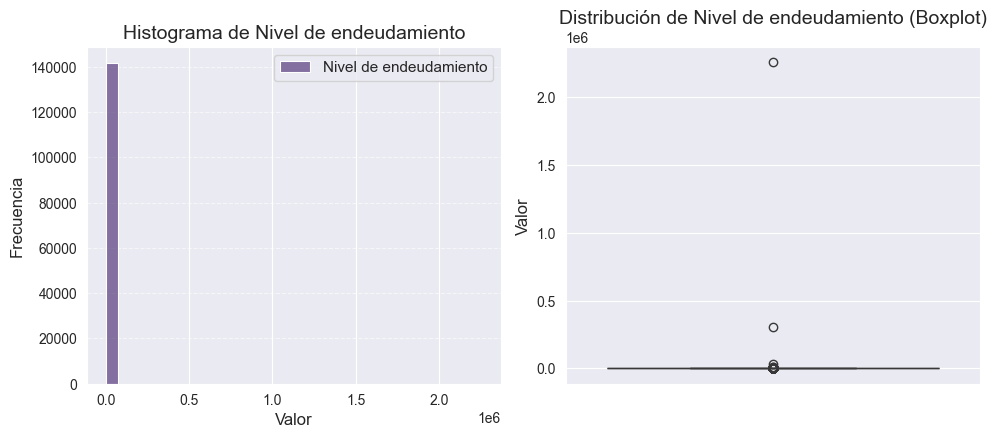

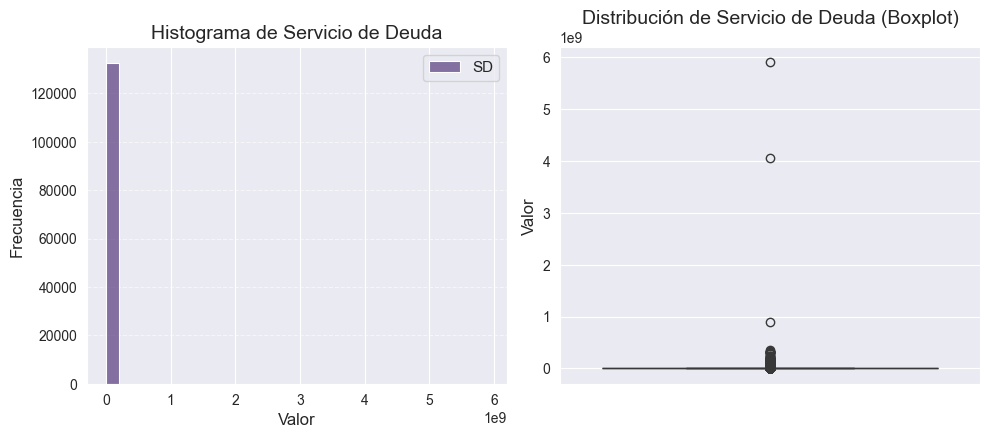

In [62]:
data8 = data['Nivel de endeudamiento']
data9 = data['SD']

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)  
sns.histplot(data8, bins=30, color='#573d7f', label='Nivel de endeudamiento', alpha=0.7)
plt.title('Histograma de Nivel de endeudamiento', fontsize=14)
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.subplot(2, 2, 2)  
sns.boxplot(data8, color='#573d7f')

plt.title('Distribución de Nivel de endeudamiento (Boxplot)', fontsize=14)
plt.ylabel('Valor', fontsize=12)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)  
sns.histplot(data9, bins=30, color='#573d7f', label='SD', alpha=0.7)
plt.title('Histograma de Servicio de Deuda', fontsize=14)
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.subplot(2, 2, 2)  
sns.boxplot(data9, color='#573d7f')
plt.title('Distribución de Servicio de Deuda (Boxplot)', fontsize=14)
plt.ylabel('Valor', fontsize=12)
plt.tight_layout()
plt.show()

1. **Nivel de endeudamiento**:
   - El **histograma** muestra una gran concentración de empresas con un nivel de endeudamiento cercano a cero, lo que indica que muchas empresas tienen un nivel de deuda muy bajo o inexistente.
   - El **boxplot** confirma que la mayoría de los valores se agrupan cerca de cero, pero también se observan **outliers** que representan empresas con niveles de endeudamiento significativamente más altos, lo que podría reflejar una estructura de capital con una mayor proporción de deuda.

2. **Servicio de deuda**:
   - El **histograma** muestra una distribución similar, con la mayoría de las empresas reportando un servicio de deuda muy bajo o nulo. Esto sugiere que muchas empresas tienen una carga financiera baja o no tienen deuda pendiente de pago.
   - En el **boxplot**, también se aprecian varios **outliers** en valores altos, lo que indica que algunas empresas están enfrentando altos costos de servicio de deuda, lo cual podría reflejar una gran carga financiera para algunas de ellas.


# Variable objetivo

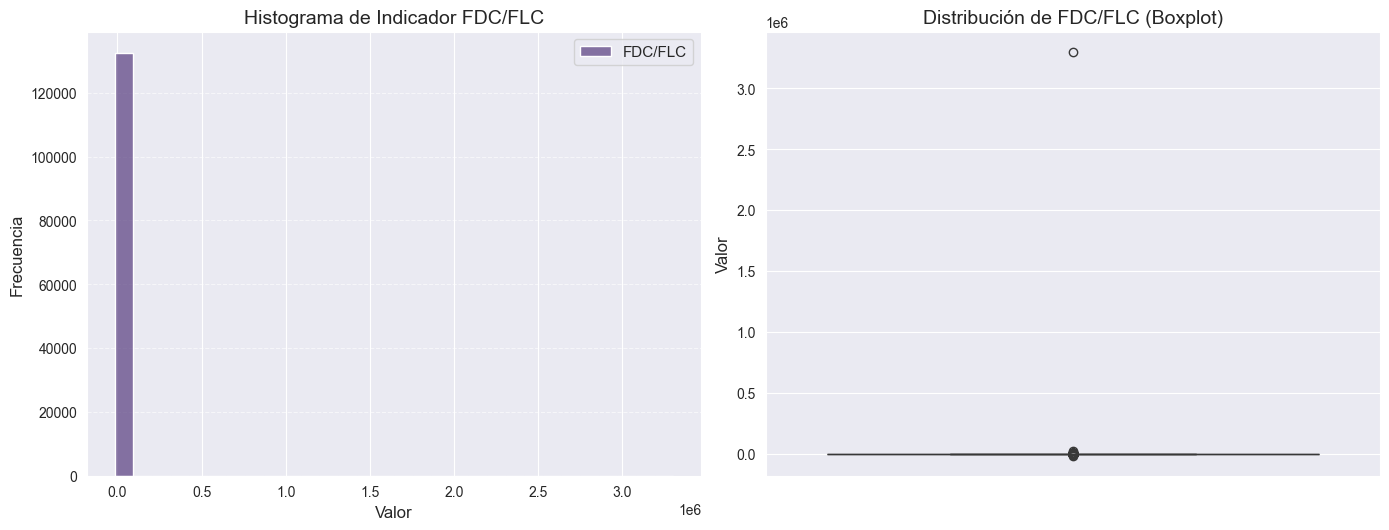

In [63]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)  
sns.histplot(data['FDC/FLC'], bins=30, color='#573d7f', label='FDC/FLC', alpha=0.7)
plt.title('Histograma de Indicador FDC/FLC', fontsize=14)
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.subplot(2, 2, 2)  
sns.boxplot(data['FDC/FLC'], color='#573d7f')
plt.title('Distribución de FDC/FLC (Boxplot)', fontsize=14)
plt.ylabel('Valor', fontsize=12)
plt.tight_layout()
plt.show()


El gráfico del **Indicador FDC/FLC** muestra  la mayoría de los valores se concentran cerca de cero, lo que sugiere que la variable tiene una prevalencia significativa de observaciones con valores bajos. Sin embargo, el boxplot revela la presencia de **outliers** con valores extremadamente altos, indicando que algunos casos son excepcionales o atípicos en comparación con la mayoría de los datos. Este patrón de distribución podría señalar una variable con pocos casos extremos que merecen una atención especial, mientras que la gran mayoría de las observaciones tienen valores cercanos a cero.

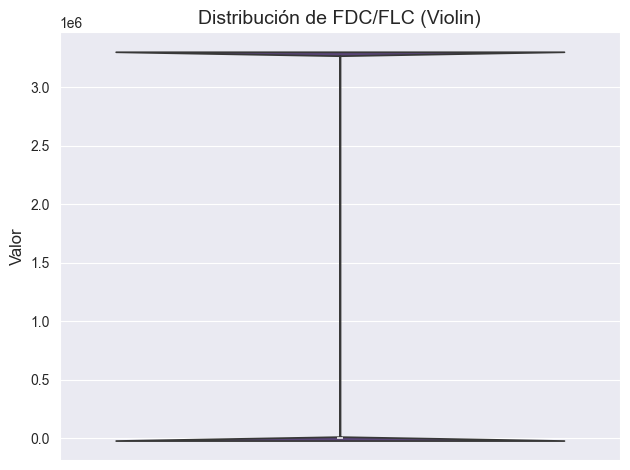

In [64]:
sns.violinplot(data['FDC/FLC'], color='#573d7f')
plt.title('Distribución de FDC/FLC (Violin)', fontsize=14)
plt.ylabel('Valor', fontsize=12)
plt.tight_layout()
plt.show()

El gráfico resalta la **asimetría** de la distribución, ya que se observa una sección más ancha hacia la parte baja, mientras que la cola en valores altos es más estrecha. Esto confirma la presencia de **outliers** o valores extremos, que representan casos excepcionales o atípicos, aunque son mucho menos frecuentes que los valores cercanos a cero.

## Transformar a Intervalos

In [50]:
bins = [-np.inf, 0, 0.67, 0.80, 1, np.inf]
labels = ['<0', '[0, 0.67)', '[0.67, 0.80)', '[0.80, 1)', '[1, ∞)']

data['FDC_FLC_categoria'] = pd.cut(data['FDC/FLC'], bins=bins, labels=labels, right=False)

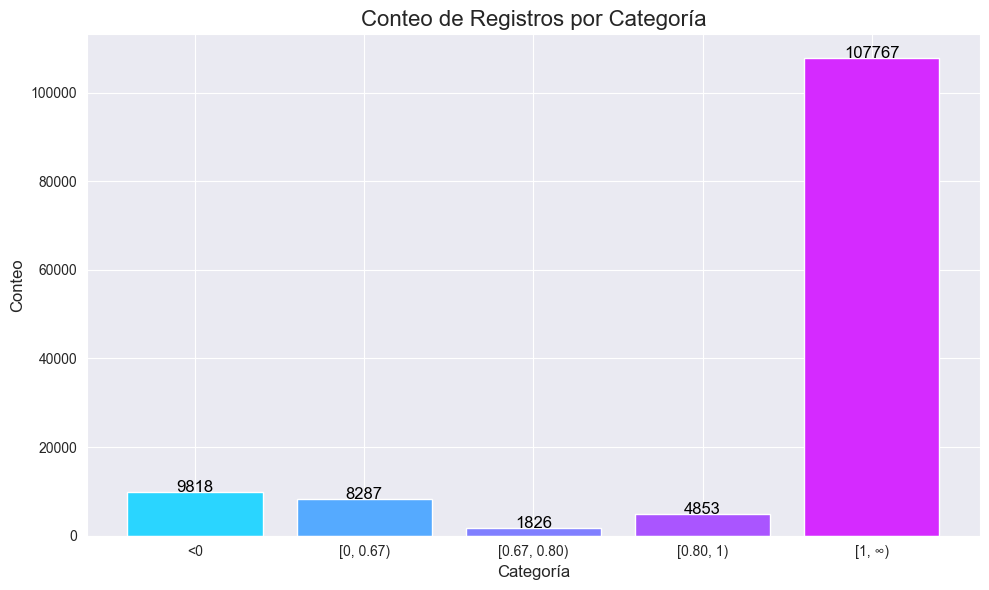

In [40]:
conteo_categorias = data['FDC_FLC_categoria'].value_counts().reset_index()
conteo_categorias.columns = ['Categoría', 'Conteo']
conteo_categorias = conteo_categorias.sort_values('Categoría')


value_counts = conteo_categorias
plt.figure(figsize=(10, 6))
colors = sns.color_palette('cool', len(value_counts)) 
bars = plt.bar(
        value_counts['Categoría'], 
        value_counts['Conteo'], 
        color=colors, 
    )
for bar in bars:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.1,
            str(bar.get_height()),
            ha='center',
            fontsize=12,
            color='black'
    )
plt.title('Conteo de Registros por Categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Conteo', fontsize=12)
plt.tight_layout()
plt.show()

Los registros están distribuidos en cinco categorías:

1. **<0**: 9,818 registros.
2. **[0, 0.67)**: 8,287 registros.
3. **[0.67, 0.80)**: 1,826 registros.
4. **[0.80, 1)**: 4,853 registros.
5. **[1, ∞)**: 107,767 registros.

La categoría **[1, ∞)** tiene una **gran mayoría** de los registros, lo que indica que la mayoría de los valores del **Indicador FDC/FLC** caen dentro de este rango, sugiriendo una prevalencia de valores altos en el conjunto de datos. Las otras categorías tienen una cantidad mucho menor de registros, lo que resalta que solo un número pequeño de empresas tienen valores bajos o moderados en este indicador. Esta distribución refuerza la idea de que la mayoría de las empresas tienen un comportamiento **positivo o elevado** en términos de **FDC/FLC**.

Distribución general de cada rango para FDC/FLC

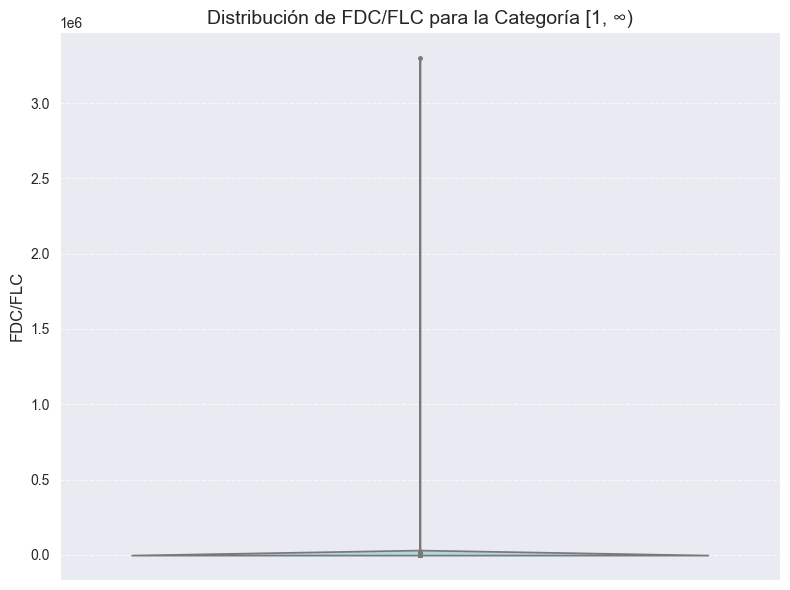

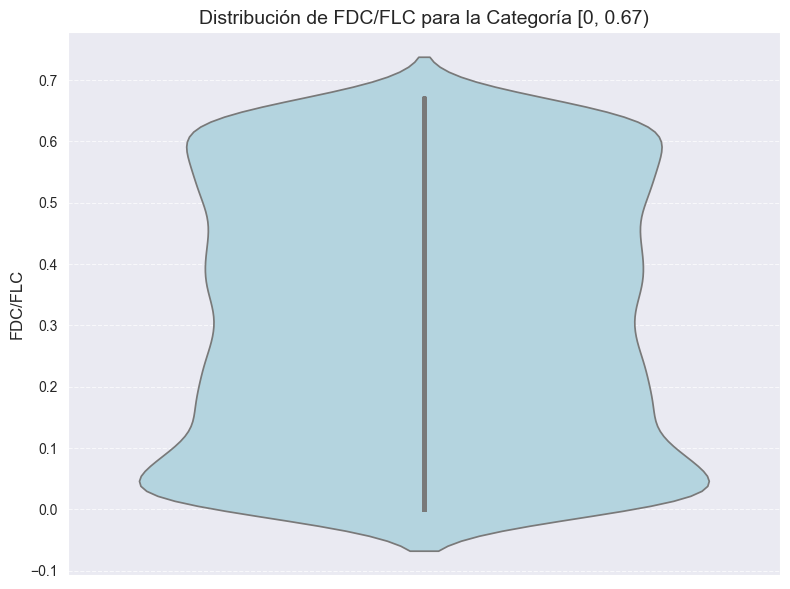

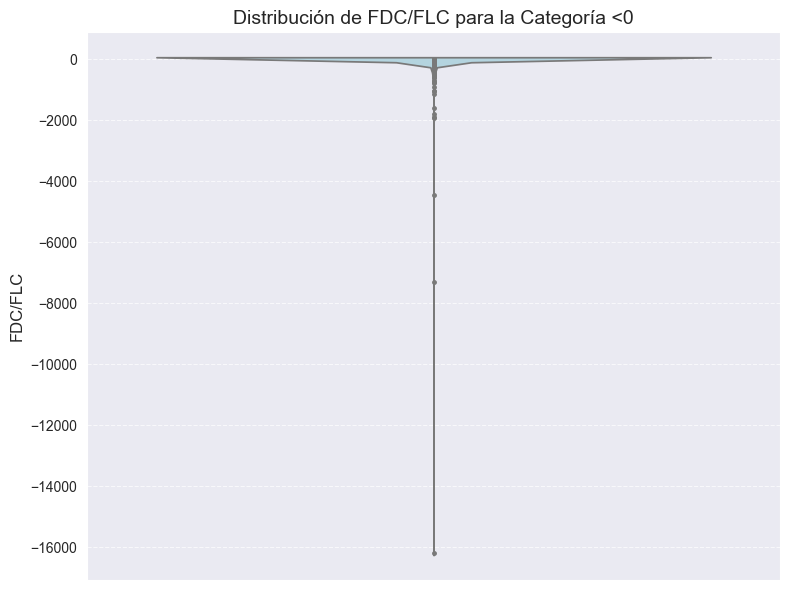

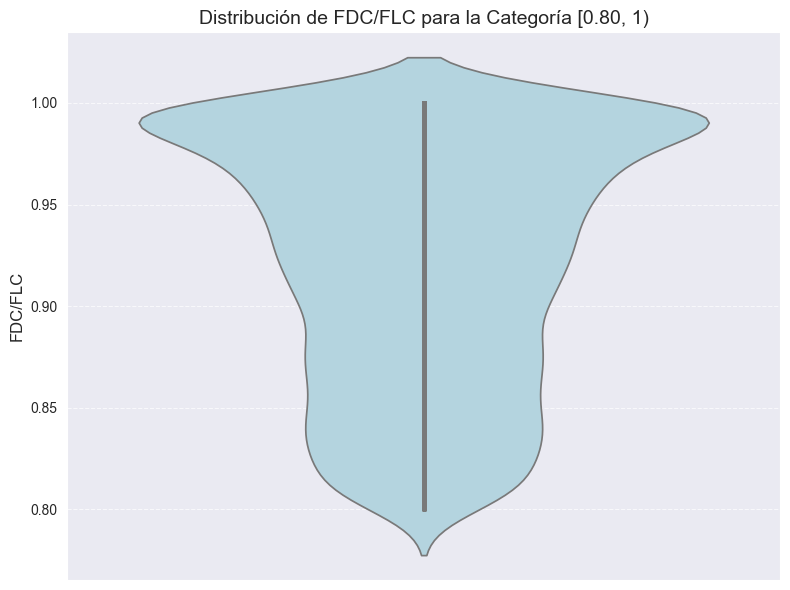

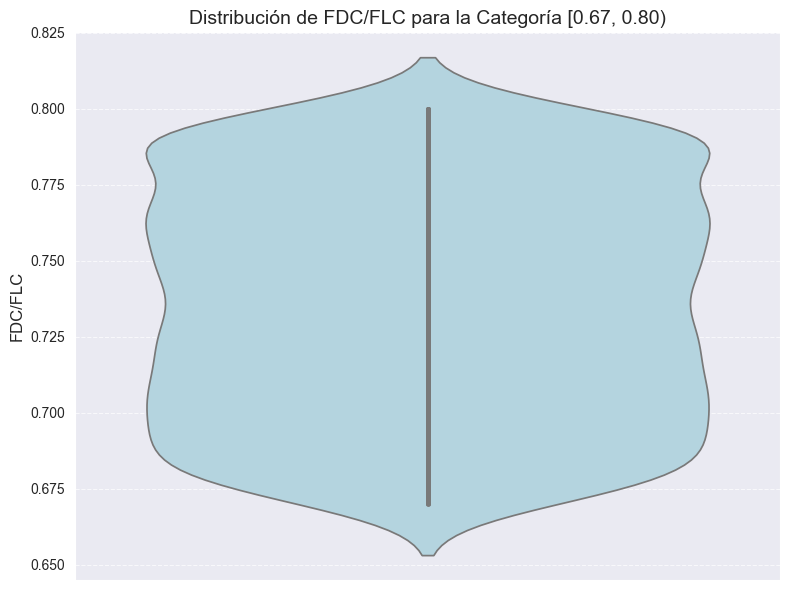

In [56]:
categorias = data['FDC_FLC_categoria'].dropna().unique()

# Crear gráficos de violín por categoría
for categoria in categorias:
    df_categoria = data[data['FDC_FLC_categoria'] == categoria]
    
    # Crear el gráfico de violín
    plt.figure(figsize=(8, 6))
    sns.violinplot(
        data=df_categoria,
        y='FDC/FLC',
        inner='point',  # Mostrar todos los puntos dentro del gráfico
        color='lightblue'  # Cambiar el color del gráfico
    )
    
    # Personalización del gráfico
    plt.title(f'Distribución de FDC/FLC para la Categoría {categoria}', fontsize=14)
    plt.ylabel('FDC/FLC', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

- **Categoría [1, ∞)**: El gráfico muestra que los valores de **FDC/FLC** en esta categoría están muy concentrados cerca de un valor máximo, lo que indica que la mayoría de los registros de esta categoría tienen valores muy altos para este indicador. La distribución es muy estrecha, lo que sugiere poca variabilidad.

- **Categoría [0, 0.67)**: La distribución en esta categoría es más amplia, con valores que se distribuyen desde cero hasta aproximadamente 0.67. El gráfico de violín muestra que la mayoría de los valores están cerca del centro, indicando una concentración de registros con valores relativamente bajos, pero también una mayor dispersión en comparación con la categoría anterior.

- **Categoría [0.67, 0.80)**: En esta categoría, la distribución muestra una ligera variabilidad, con una mayor concentración de valores alrededor del centro de la distribución, pero con algo de dispersión hacia valores superiores.

- **Categoría <0**: El gráfico en esta categoría revela que los valores de **FDC/FLC** son extremadamente bajos, con una concentración cerca de cero. Sin embargo, también se observan varios **outliers** muy negativos, lo que sugiere que algunas observaciones tienen valores inusualmente bajos para este indicador.

- **Categoría [0.80, 1)**: En esta categoría, la distribución es estrecha, con una clara concentración de valores entre 0.80 y 1, indicando que los registros de esta categoría tienen valores altos pero no extremos.
